<a href="https://colab.research.google.com/github/Gab-mf/Desafio_reg_linear/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("MKT.csv")
dados.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


# Análise Descritiva

*   Utilizei a função describe() para analisar melhor como o dataset está distribuído e também plotei os boxplots de cada coluna utilizando a biblioteca plotly para analisar visualmente a distribuição de cada variável




In [ ]:
dados.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("MKT.csv")
dados.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
dados.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.box(dados, x="youtube")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(dados, x="facebook")
fig.update_traces(line_color="green")

In [ ]:
fig = px.box(dados, x="newspaper")
fig.update_traces(line_color="yellow")

In [ ]:
fig = px.box(dados, x="sales")
fig.update_traces(line_color="red")

# Análise Exploratória


A análise exploratória foi essencial para verificar como uma variável se relaciona com outra. Para essa etapa, utilizei os gráficos pairplot e heatmap da biblioteca seaborn, na qual foi possível visualizar como todas as variáveis se relacionam. Sobre essa etapa, foi possível observar que:
* O retorno do investimento (sales) aumentam quando o investimento em publicações do facebook e youtube aumentam;
* O retorno do investimento em newspaper não tende a ser tão bom quanto o do youtube e facebook



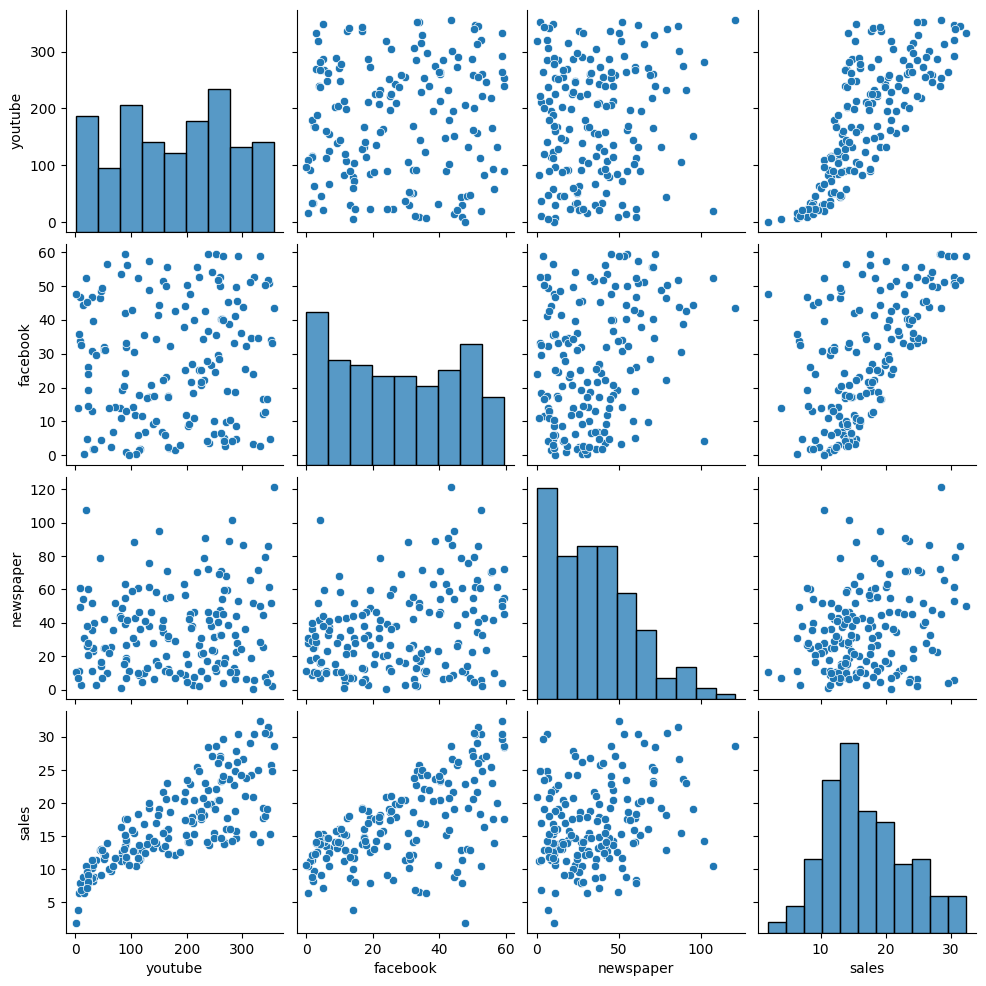

In [ ]:
sns.pairplot(dados)

In [ ]:
dados.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

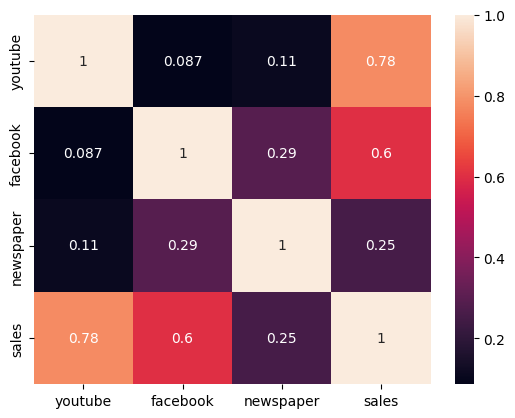

In [ ]:
sns.heatmap(dados.corr(), annot=True)

# Modelagem
Nessa etapa, foi feita a divisão do dataset entre X (youtube, facebook, newspaper) e Y (sales) onde X são as variáveis que tentam prever a variável Y que é o nosso target. Em seguida, essas váriáveis foram divididas novamente entre treino e teste e treinadas com o auxílio da biblioteca sklearn, amplamente utilizada em problemas de regressão linear.

In [ ]:
dados.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
X = dados[['youtube', 'facebook', 'newspaper']]
Y = dados[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(136, 3)
(35, 3)
(136, 1)
(35, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

# Predição
Para fazer a predição foi utilizado novamente a biblioteca sklearn  

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [ ]:
print("r_quadrado:", r)

r_quadrado: 0.872863085701216


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vendas')

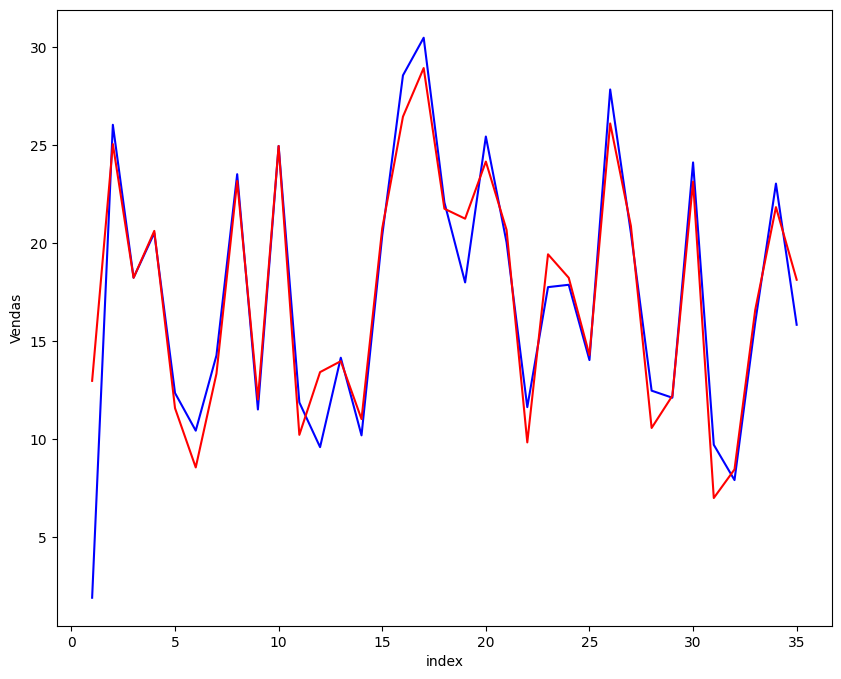

In [ ]:
c = [i for i in range(1, 36, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("index")
plt.ylabel("Vendas")

In [ ]:
#Premissa 1

youtube = 100.0
facebook = 60.0
newspaper = 10.0
entrada = [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([19.79006414])

In [ ]:
#Premissa 2

youtube = 20.0
facebook = 30.0
newspaper = 80.0
entrada = [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([10.41731923])

In [ ]:
#Premissa 3

youtube = 50.0
facebook = 120.0
newspaper = 40.0
entrada = [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29.24822559])